# This is a Web Scrapping (end to end project) for Zimbabwe Real Estate market using Python, SQL and Power BI.

    The Zimbabwe housing market presents a unique challenge for potential buyers and investors due to the lack of centralized and up-to-date information regarding property listings, prices, and market trends. This scarcity of accessible data hinders informed decision-making processes for individuals and organizations interested in buying, selling, or investing in real estate within Zimbabwe.

#### Objective

    The objective of this project is to develop an end-to-end ETL (Extract, Transform, Load) process using Python, SQL, and Power BI to collect, process, analyze, and visualize data related to the Zimbabwe housing market. By leveraging web scraping techniques, I aim to extract property listing information from various online sources, transform and standardize the data, and load it into a centralized MSSQL database. Subsequently, I will utilize SQL queries and data processing techniques to derive valuable insights such as average property prices, location-wise trends, and market dynamics. Finally, I will create interactive dashboard using Power BI to visualize these insights in a user-friendly manner, enabling stakeholders to make well-informed decisions regarding real estate transactions in Zimbabwe.

#### Key Deliverables
    
    1. Web Scraping Module: To develop a Python-based web scraping module to extract property listing data from multiple online sources, including real estate websites, classified ads, and property portals operating within Zimbabwe.
    
    2. Data Processing Pipeline: To design and implement a robust ETL process to cleanse, transform, and standardize the scraped data. This involves handling missing values, standardizing property attributes, and enriching the dataset with additional information where applicable.
    
     3. SQL Database: To create and maintain a relational database using SQL Server (Structured Query Language) to store the processed housing market data. Define appropriate table structures to accommodate different types of property listings and associated attributes.
     
    4. Data Analysis: To utilize SQL queries and data manipulation techniques to perform exploratory data analysis (EDA) on the housing market dataset. Extract insights regarding average property prices, popular locations, property types, and market trends over time. 
    
    5. Visualization and Reporting: To develop interactive dashboards and visual reports using Power BI to present the findings of the data analysis in a visually appealing and informative manner. Incorporate filters, slicers, and drill-down capabilities to facilitate dynamic exploration of the housing market data.
    
    6. Documentation: To prepare comprehensive documentation covering the project workflow, data sources, data processing steps, SQL schema, and Power BI reports. 

#### Outcomes

    1. A scalable ETL pipeline capable of continuously fetching, processing, and updating housing market data from online sources.or. 
    
    2. Insights into key metrics and trends within the Zimbabwe housing market
    
    3. Interactive Power BI dashboard providing intuitive visualization of housing market dynamics, accessible to both technical and non-technical users.

### 1. THE DATA EXTRACTION IN PYTHON WITH BEAUTIFUL SOUP

### Importing libraries for scrapping

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

<br>

#### Hidden here is the code trials for a 1 page scrapper being the building blocks to the multi page scrapper below

In [ ]:
#using variable url to store the url 

url = "https://www.sellinghouses/pseudo_name?page=1"

page = requests.get(url, verify = False)

soup = BeautifulSoup(page.content, "html.parser")

In [3]:
#finding all sections with class name "details col-md-7 col-sm-7 col-xs-8" and tag 'div', and storing them in variable name sections1 
sections = soup.find_all('div', class_ = "details col-md-7 col-sm-7 col-xs-8")

In [32]:
# In all the sections we want to find the data under name, location, price and area

# for loop will help us to go through all subsections with the class names that hold the features we are looking for

data = []
for subs in sections:
    
    title = subs.find('h5', class_ = 'listing-title').text.strip()
    price = subs.find('div', class_ = 'pull-left usd-price-tooltip').text.strip()
    
    features = subs.find_all('li', class_ = 'property')
    for tags in features: 
        if len(features) == 4:
            bedrooms = features[-4].text 
            bathrooms = features[-3].text
            area = features[-2].text
            location = features[-1].text
        elif len(features) == 3:
            bedrooms = features[-3].text 
            bathrooms = 'not stated'
            area = features[-2].text
            location = features[-1].text
        else:
            bedrooms = 'not stated'
            bathrooms = 'not stated'
            area = features[-2].text
            location = features[-1].text 
            
    
    #Storing the information into variable data
    data.append([title, price, bedroomsarea, location])
    
data

[['Glen Lorne - House',
  '$3,200,000',
  '5 bedrooms',
  '4 bathrooms',
  '56280 m²',
  'harare north'],
 ['Arlington - Townhouse Complex, House',
  '$125,000',
  '3 bedrooms',
  '2 bathrooms',
  '324 m²',
  'harare south'],
 ['Athlone - House',
  '$250,000',
  '3 bedrooms',
  'not stated',
  '3600 m²',
  'harare east'],
 ['Banket - House',
  '$160,000',
  '3 bedrooms',
  '2 bathrooms',
  '3092 m²',
  'banket'],
 ['Ashdown Park - House',
  '$55,000',
  '6 bedrooms',
  '4 bathrooms',
  '500 m²',
  'harare west'],
 ['Riverside North - House',
  '$138,000',
  '2 bedrooms',
  '1 bathrooms',
  '10000 m²',
  'bulawayo east'],
 ['Chisipite - House',
  '$475,000',
  '3 bedrooms',
  '2 bathrooms',
  '4070 m²',
  'harare north'],
 ['Mandara - House',
  '$400,000',
  '4 bedrooms',
  '3 bathrooms',
  '4703 m²',
  'harare east'],
 ['Glen Lorne - House',
  '$360,000',
  '3 bedrooms',
  '2 bathrooms',
  '4599 m²',
  'harare north'],
 ['Chisipite - Townhouse Complex',
  '$500,000',
  '3 bedrooms',
  

<br>

### Scrapping the data

In [ ]:
#The website now had 173 pages as at 2 May 2024, hence we store our pages in the variable stop

stop = 173 # we will be scrapping all pages

# we take our url without the page number at the end as we will append at each iteration with the number in the range(1, stop+1)
url_base = "https://www.www.sellinghouses/pseudo_name?page="

# Creating an empty list to later store our data
data = []

# using for loop to iterate over the all the pages on the website

for x in range(1,stop+1): 
    
    new_url_base = f"{url_base}{x}"
    
    # Sending the request to the website to get the data and prompting it not to verify our request 
    web = requests.get(new_url_base, verify = False) 
    
    #urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    
    # if web status code is 200 it means that our request was successful
    if web.status_code == 200: 
        web_page = BeautifulSoup(web.content, 'html.parser')
        
        # We assign all the sections of the web to the variable listings 
        listings = web_page.find_all('div', class_ = "details col-md-7 col-sm-7 col-xs-8")
        
        # having assigned all house listings into the variable listings, we need now to scrap title, price, bedrooms, bathrooms, area and location
        
        # we locate the tag that the name is found in our BeautifulSoup object name webpage to find the tags and class name where we find the properties we want to scrap
            
        for listing in listings:
            
            title_element = listing.find('h5', class_ = 'listing-title')
            if title_element:
                title = listing.find('h5', class_ = 'listing-title').text.strip()
            else:
                title = 'untitled'

            
            price_element = listing.find('div', class_ = 'pull-left usd-price-tooltip')
            if price_element:
                price = listing.find('div', class_ = 'pull-left usd-price-tooltip').text.strip()
            else:
                price = 'no price'
        
            # now using web inspection we find out that location, area, bedrooms and bathrooms have the same tag and html class name
            
            # on some listings there is no number of bathrooms, hence we declare not stated where the is no data entry 
        
            # we use our method to find all tags with name 'li' and class name 'property' and assign them into features variable
            features = listing.find_all('li', class_ = 'property')
            
            # from browsing through the page we found out that property features are at most 4, thus bedrooms, bathrooms, area and location.
            if len(features) == 4:
                bedrooms = features[-4].text 
                bathrooms = features[-3].text
                area = features[-2].text
                location = features[-1].text
            elif len(features) == 3:
                bedrooms = features[-3].text 
                bathrooms = 'not stated'
                area = features[-2].text
                location = features[-1].text
            elif len(features) == 2:
                bedrooms = 'not stated'
                bathrooms = 'not stated'
                area = features[-2].text
                location = features[-1].text
            else:
                bedrooms = 'not stated'
                bathrooms = 'not stated'
                area = 'not stated'
                location = 'not stated'
        
                 
            #appending our informdation into the list data
            data.append([title, price, bedrooms, bathrooms, area, location])

### Creating a dataframe to load the list of the housing data

In [7]:
# since our result data is in a list we now create a dataframe for the scrapped data

zw_housing = pd.DataFrame(data, columns = ['title', 'price', 'bedrooms', 'bathrooms', 'area', 'location'])

In [8]:
zw_housing.head()

,title,price,bedrooms,bathrooms,area,location
0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


In [9]:
# Checking the data entries we have loaded. We have 3306 listing in our data
zw_housing.shape

(3306, 6)

In [12]:
# Saving the data into a csv file

zw_housing.to_csv('zw_housing_data.csv')

<br>

### Loading the housing data into SQL Server

In [11]:
# we first start by importing our data (we avoid running the scrapper again since we did that part already)

zw_housing = pd.read_csv('zw_housing_data.csv')
zw_housing.head()

,Unnamed: 0,title,price,bedrooms,bathrooms,area,location
0,0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


In [37]:
# We need to drop the column 'Unnamed: 0'

zw_housing.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [38]:
zw_housing.head(5)

,title,price,bedrooms,bathrooms,area,location
0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


### We initiate loading the dataframe to the MSSQL database zw_housing

In [24]:
# Connecting to the SQL Server Database

server = 'MESAH\SQLEXPRESS'
database = 'Zim_Property_Data'

In [25]:
# Creating the connection string

conn_str = f'mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'

In [28]:
# table name where we are loading the data in MSSQL

table_name = 'zw_housing'

In [39]:
# Writing the DataFrame to SQL Server
zw_housing.to_sql(name=table_name, con=conn_str, if_exists='append', index=False)

165

We have successfully loaded the data into the database zw_housing 😃!!!! We now move on to MSSQL for the next steps (step number ii)

<br>

### 2. THE DATA TRANSFORMATION SECTION IN SQL SERVER

    After loading the data into the database zw_housing. We query the data to have a look at the data.

    We can observe that the names need some touch ups and most importantly the data types themselves for example, we have the price column which is expected to be a numeric column but is of the VARCHAR type.

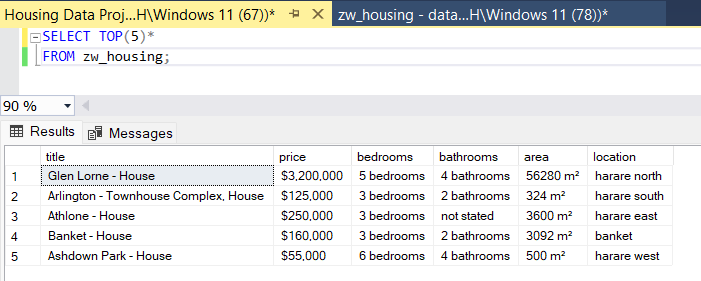

<br>

    In the next steps will work on the points below
 
1. Create a new column for house type from the title
2. Create a new column for surburb from the title
3. Create a new column for city/town from location
4. Convert the price, bedrooms, bathrooms and area columns to integer data 
5. Check for NULL values in the data

    We start by creating a view that we want of the data using a combination of the SUBSTRING function and the CHARINDEX

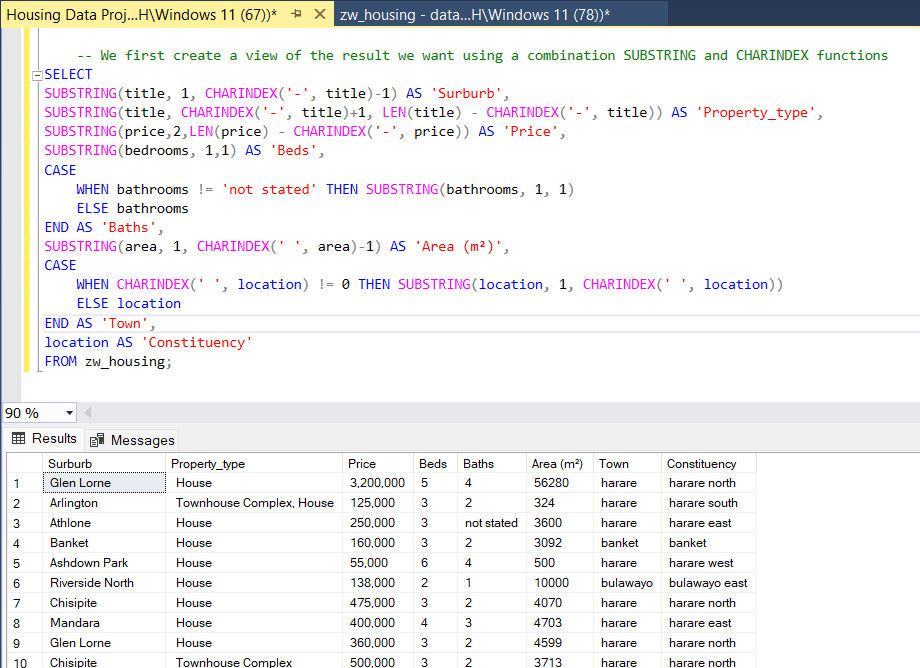

<br>

    NOw that we have a view that we want, we proceed with staging our database thus to create a table that has these transformations that we have done above so that we don't lose the original data in zw_housing. We call the staged table house_data1

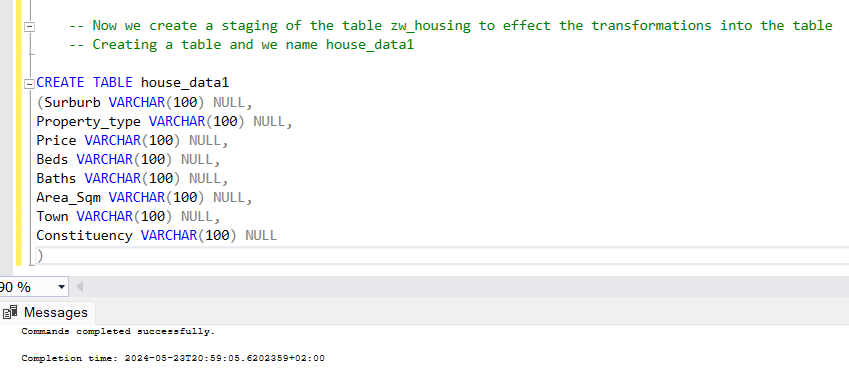

<br>

    Making use of the earlier view to effect these transformations into the table housing_data1

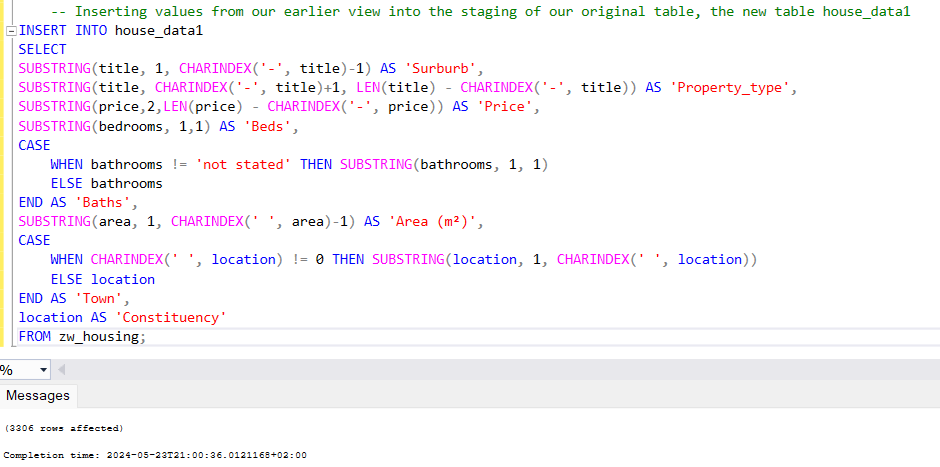

<br>

    Checking the transformed data in the table house_data1

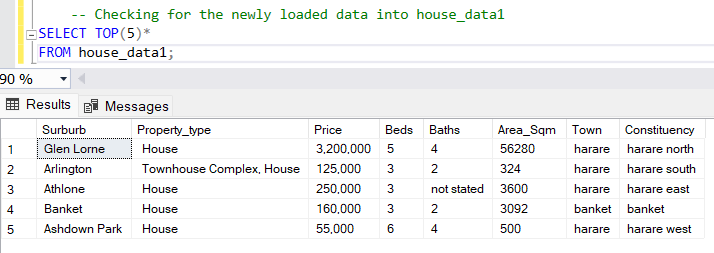

<br>

    Removing properties that have no location data 
1. There is need to stage again our table to ensure re-usability of the tables
2. In this step I create the second staging of the housing_data1 table and name it house_data2

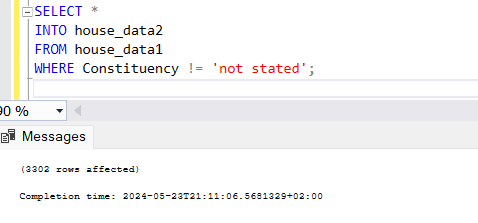

<br>

    Checking for the data entries with 'not stated' number of bathrooms

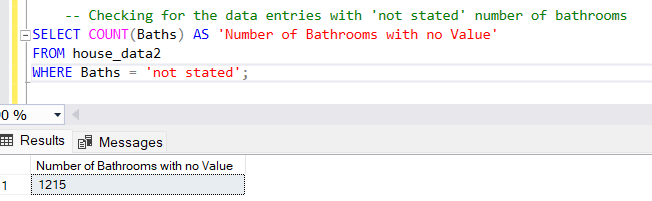

There are 1,215 properties where the number of bathrooms is not stated.  These data entries are a lot and we can't afford to lose them

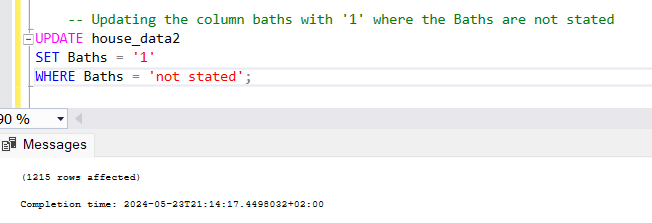

<br>

### Sorting the Property Type Column

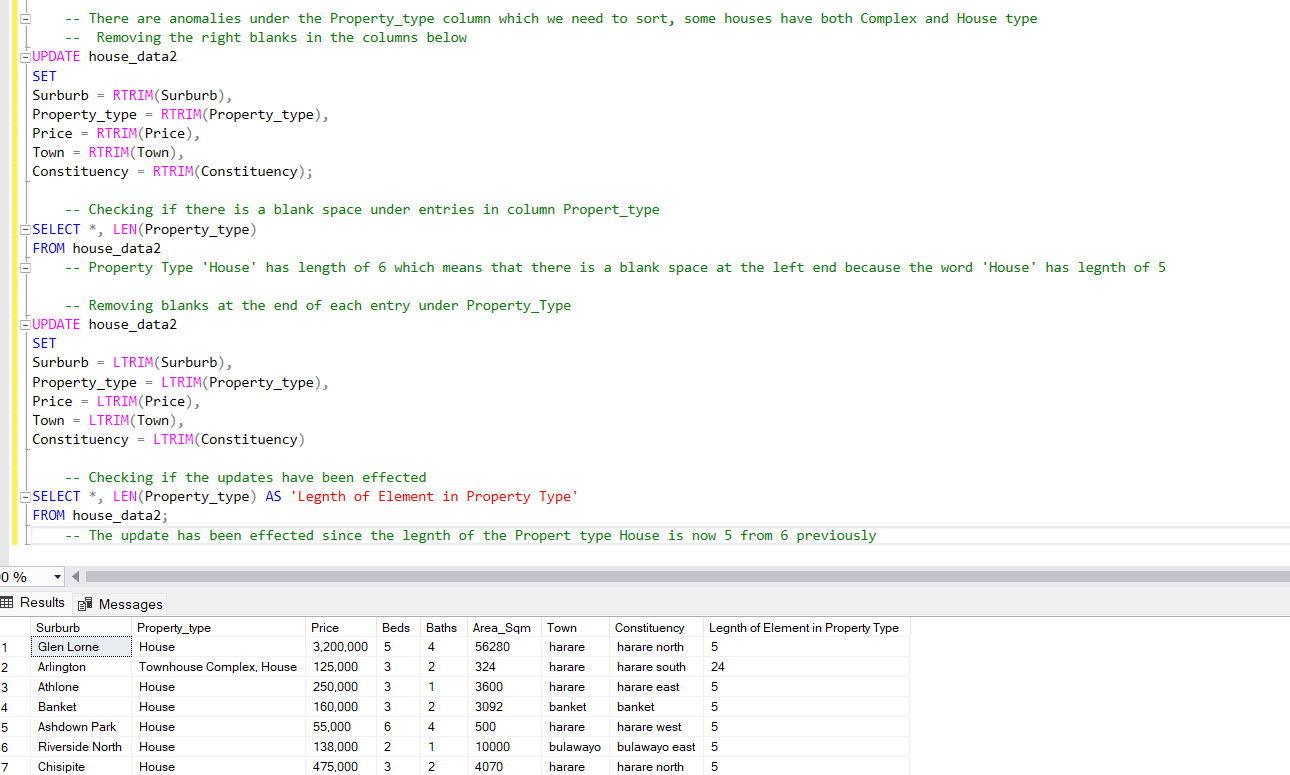

<br>

    Standardizing the Property Types

Standardizing the Property Type column to have proper property types, there are property type like 'House, Townhouse Complex' which need to be cleaned to pick only one type

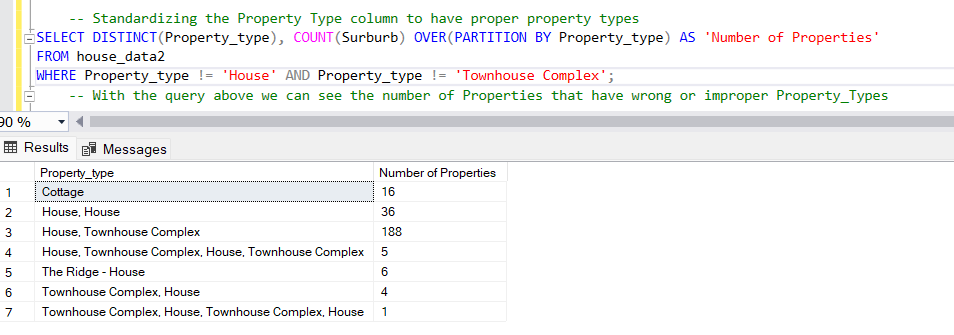

    The resulting view after standardizing the column

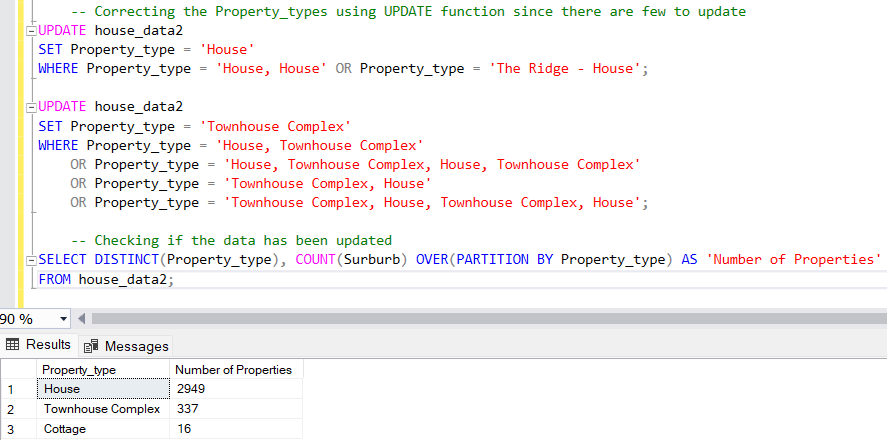

<br>

### Converting Prices, Beds, Baths and Area from VARCHAR datatype to INT Data type

1. Beds

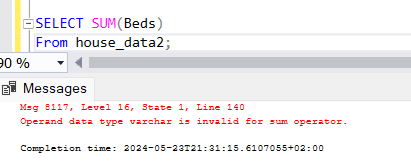

    We try to find the sum of the number of beds in all the properties and get an error that the data type varchar is invalid for sum operator, hence the need to convert to int data type.


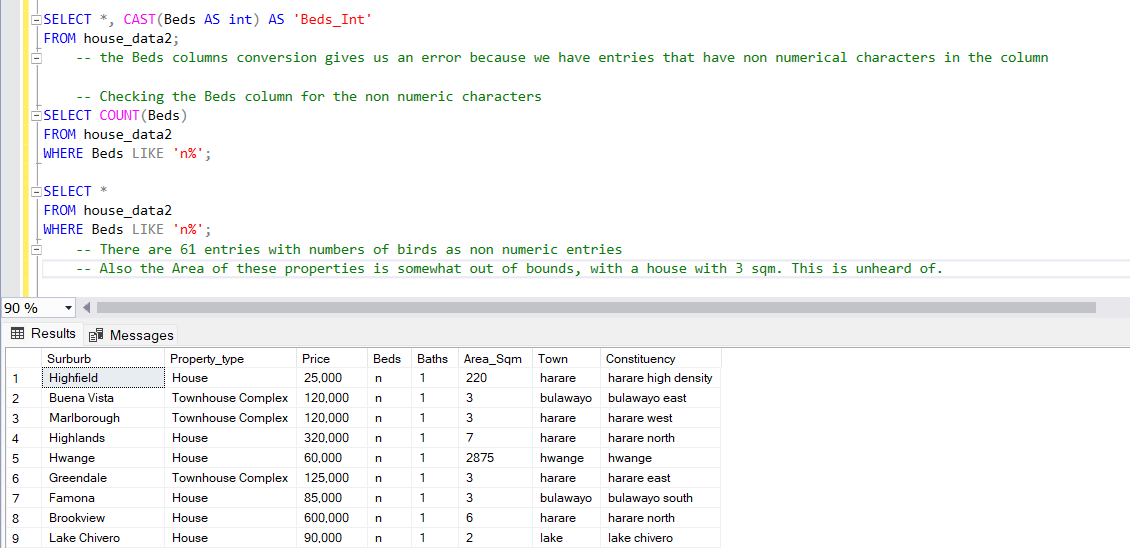

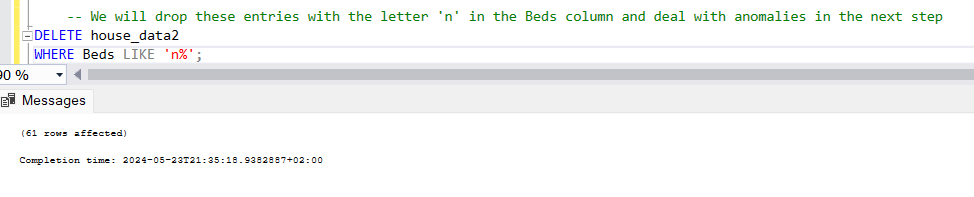

    Convertng the Beds column to INT

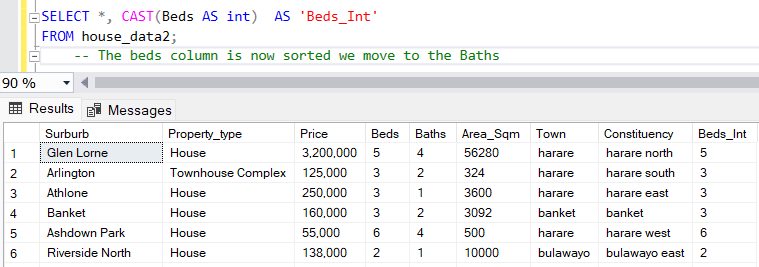

<br>

2. Baths

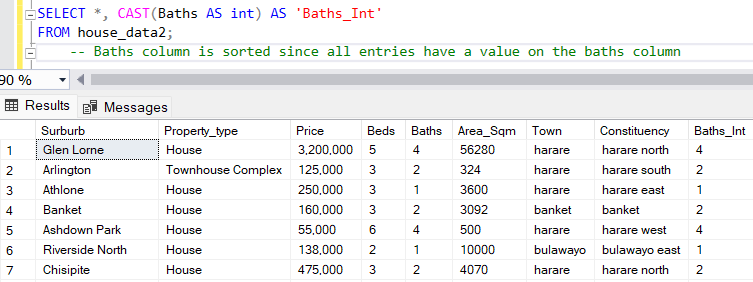

<br>

3. Area

    In this column there are those properties that were observed when we were converting the Beds column. These properties have area is square meters less than the value of 5. In this project we will accept a minimum of 150sqm for the properties

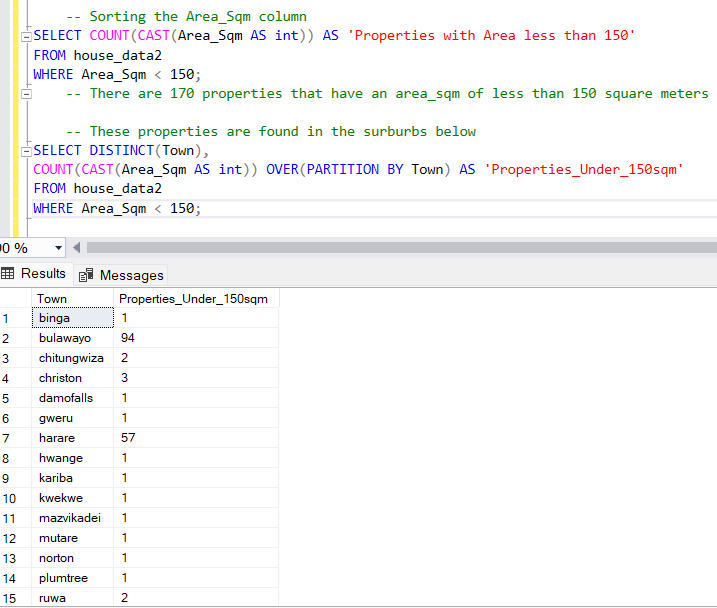

    94 properties under 150 sqm are in Bulawayo, 57 in Harare and rest in other towns, at least 80% of these are in two major towns Harare and Bulawayo. We remove from our dataset the properties that have less than 150 sqm under area.

<br>

3. Price

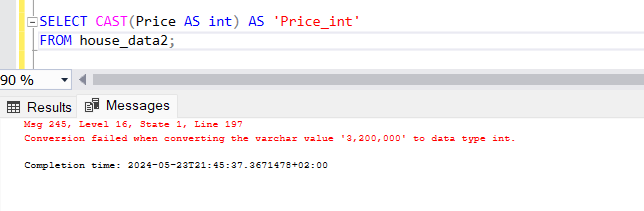

    We are getting error above, We can replace the ',' with '' in our columns.

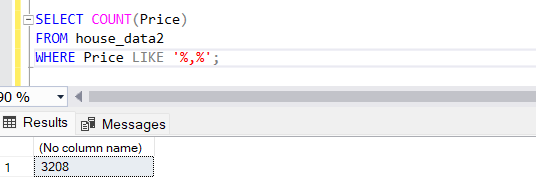

    Out of 3,241 rows there are 3,208 rows that this comma in the entries under Price column. Replacing these ',' under the column Price with ''

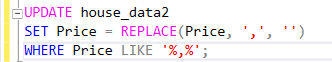

    Only 3,208 rows have been affected out of 3,241 which means we have 33 rows that need to be checked.

    Removing unwanted entries under the price column

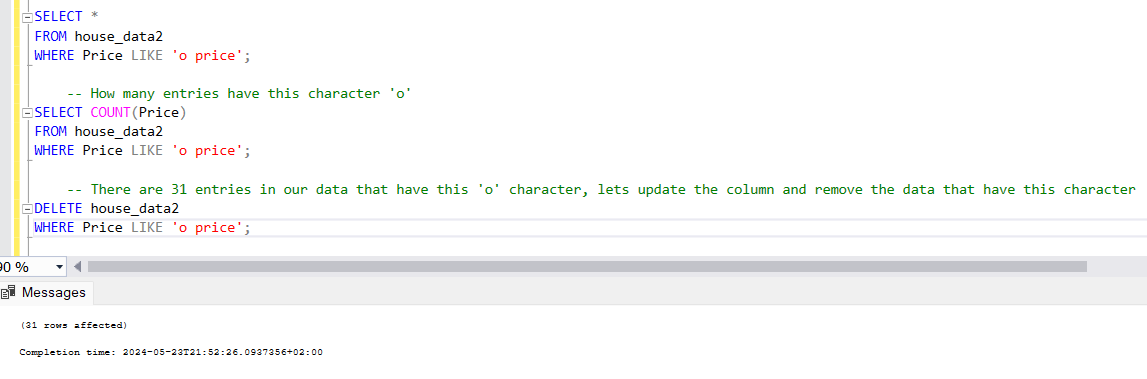

<br>

    Updating the table with the new data types of Price, Beds, Baths and Area as FLOAT, INT, INT and INT

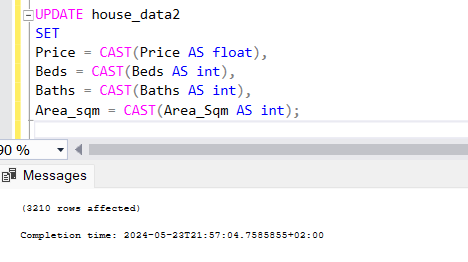

<br>

     Checking out the transformed data 

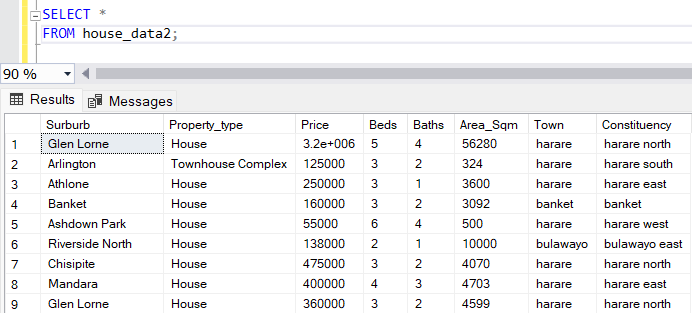

    We need to fix the price column to remove the exponentials by converting to int data type.

<br>

    First converting to float then converting to int with the outer cast function

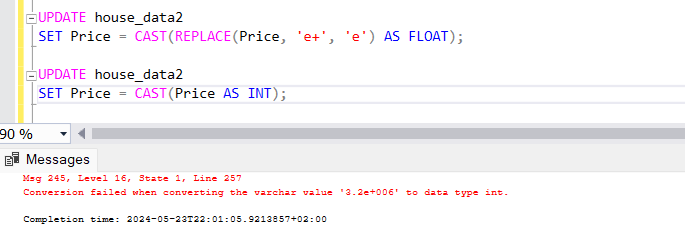

    😥😥😥😥😥😥😥😥😥😥😥😥😥😥😥😥

    Not very successful in doing the above, however i ended up staging the house_data2 to house_dataf, And changed the data types from the creation onset and inserted the house_data2 into the house_dataf table.


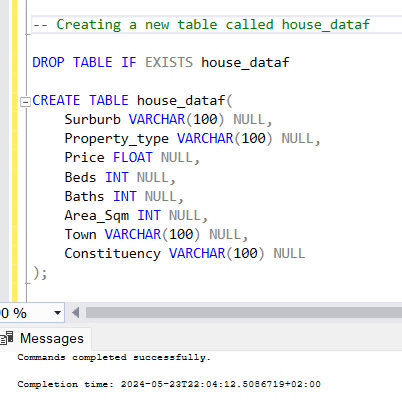

<br>

    Inserting the house_data2 table into the new house_dataf

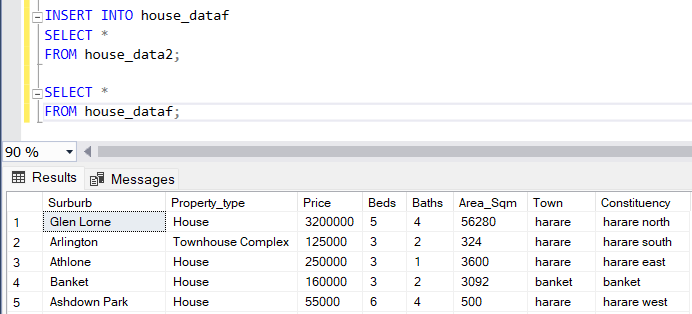

<br>

    Removing properties with Area less than 50 sqm

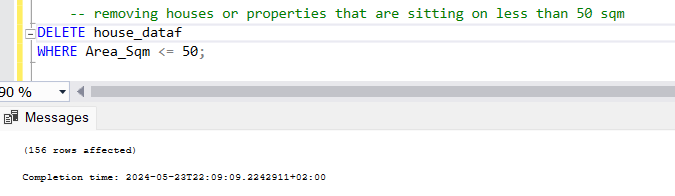

<br>

    Creating a stored procedure to use in Power BI to access the housing data

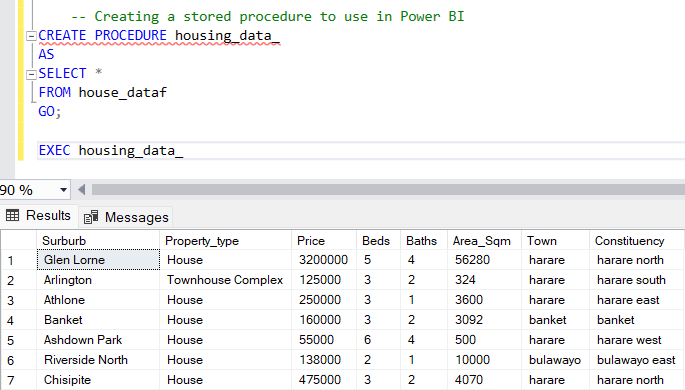

<br>

### Viewing the transformed data from SQL Server using pydoc 

In [4]:
import pandas as pd
import pyodbc

In [ ]:
# Defining the connection string
server = 'TheNiceComputerThatILove\\SQLEXPRESS'  # Double backslashes are needed to escape the backslash
database = 'Zim_Property_Data'
driver = 'ODBC Driver 17 for SQL Server'  
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [13]:
# Establishing a connection
connection = pyodbc.connect(conn_str)

# Execute a query that is a stored procedure to fetch the results into the housing_sql_cleaned DataFrame
query = "EXEC housing_data"
housing_sql_cleaned = pd.read_sql(query, connection)

# Displaying the DataFrame
housing_sql_cleaned.head()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_5240\1420379690.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing_sql_cleaned = pd.read_sql(query, connection)


,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
3,Banket,House,160000.0,3,2,3092,banket,banket
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west


<br>

### 3. EDA OF THE TRANSFORMED DATA IN PYTHON

In [2]:
# Defining the connection string
server = 'TheNiceComputerThatILove\\SQLEXPRESS'  # Double backslashes are needed to escape the backslash
database = 'Zim_Property_Data'
driver = 'ODBC Driver 17 for SQL Server'  
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [7]:
# Establishing a connection to SQL Server
connection_sql = pyodbc.connect(conn_str)

# loading the data into variable query
query = "SELECT * FROM housing"
housing_data = pd.read_sql(query, connection_sql) # storing the data in a DataFrame housing_data

# Displaying the DataFrame
housing_data.head()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14232\197126816.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing_data = pd.read_sql(query, connection_sql) # reading the output in pandas helps tp put it in tabular form


,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
3,Banket,House,160000.0,3,2,3092,banket,banket
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west


### The basic statistics of the Housing Data

In [9]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3054.0,306251.332351,2.455012e+06,700.0,60000.0,130000.0,300000.0,1.100000e+08
Beds,3054.0,3.834316,1.218936e+00,1.0,3.0,4.0,4.0,9.000000e+00
Baths,3054.0,1.908972,1.277267e+00,1.0,1.0,2.0,2.0,9.000000e+00
Area_Sqm,3054.0,673859.049771,3.619387e+07,77.0,400.0,1066.0,3322.5,2.000000e+09


    There are 3054 records of property data. The average price of these property is US$306,251 with the minimun property going for just US$700. The average number of beds is 3.8 with 1 bed being the minimum spec of the properties we are analyzing in the dataset. The highest number of beds found in the data is 9 bedrooms. The average property has 1.9 bathrooms, the most bathrooms is 9 bathrooms. The minimum property size is 77 sqaure meters with an average house spanning 673,859 square meters.

### Type of properties

In [23]:
housing_data['Property_type'].value_counts()

Property_type
House                2753
Townhouse Complex     285
Cottage                16
Name: count, dtype: int64

In [22]:
housing_data['Property_type'].value_counts()/sum(housing_data['Property_type'].value_counts())*100

Property_type
House                90.144073
Townhouse Complex     9.332024
Cottage               0.523903
Name: count, dtype: float64

    There are 2,753 houses which is 90% of the property types under listing. Townhouse complex is 9.3% of the property listed in the data and Cottage make up just under 1% of the data.

### Average Price of property types

In [48]:
housing_data[['Property_type', 'Price', 'Beds', 'Baths', 'Area_Sqm']].groupby(['Property_type']).mean()

,Price,Beds,Baths,Area_Sqm
Property_type,,,,
Cottage,117687.500000,2.625000,1.500000,1456.312500
House,301293.583000,3.894297,1.896840,747328.589539
Townhouse Complex,364727.491228,3.322807,2.049123,1918.000000


    The average price of a cottage is US$117,688 with an average of 3 beds and 2 bathrooms spanning over 1,456 square meters of land. A house on average costs 2 times more than a cottage at US$301,294 which is an average 4 bed house with 2 baths on average. A townhouse complex costs a few more thousand dollars above a house, with an average selling price of US$364,727 however with 1 bed less than a house and 2 bathrooms.

### Plotting the distribution of properties in towns

In [59]:
#importing the libraries

import matplotlib.pyplot as plt

In [80]:
housing_data['Town'].value_counts()

Town
harare         2094
bulawayo        319
chitungwiza     161
ruwa            117
norton           50
mutare           42
gweru            36
damofalls        34
kwekwe           26
marondera        24
kariba           16
chinhoyi         15
kadoma           14
victoria         11
rusape            7
masvingo          7
chiredzi          6
nyanga            6
mazowe            4
seke              4
bindura           4
beatrice          4
chivhu            4
hwange            4
lake              3
juliasdale        3
mazvikadei        3
goromonzi         3
beitbridge        3
christon          3
macheke           2
redcliff          2
chimanimani       2
banket            2
binga             2
msuna             2
chirundu          2
concession        1
mvurwi            1
gutu              1
zvishavane        1
umzingwane        1
murehwa           1
gokwe             1
karoi             1
vumba             1
selous            1
chegutu           1
deka              1
domboshawa     

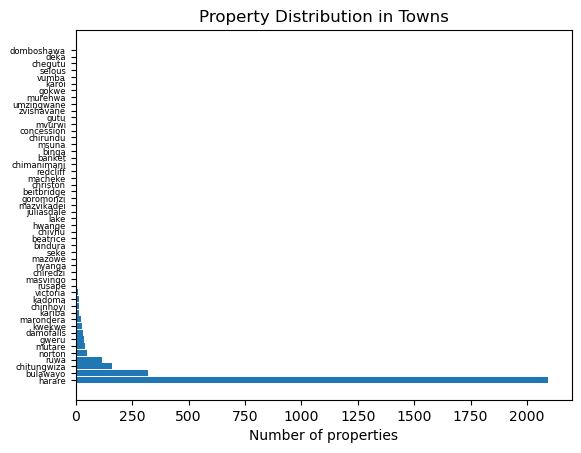

In [87]:
plt.barh(housing_data['Town'].value_counts().index, housing_data['Town'].value_counts().values, height = 0.9)
plt.yticks(fontsize = 6)
plt.title('Property Distribution in Towns')
plt.xlabel('Number of properties')
plt.show()

<br>

### Plotting the distribution of properties in towns

In [121]:
housing_data.sort_values(by = 'Price', ascending = False).head(10)

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
1548,Borrowdale,House,75646700.0,4,1,454,harare,harare north
357,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
128,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
2874,Helensvale,House,5000000.0,9,1,24000,harare,harare north
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
3018,Glen Lorne,House,3200000.0,5,3,56658,harare,harare north
233,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


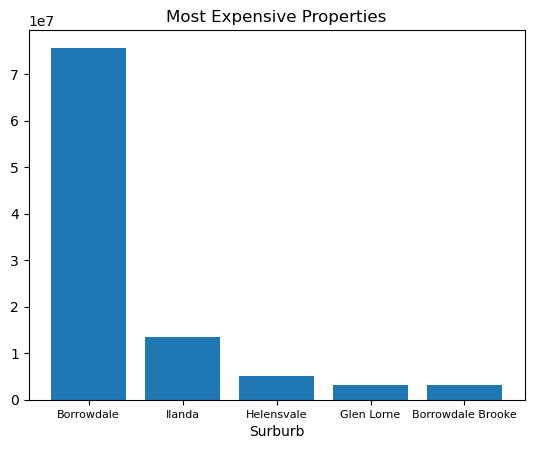

In [122]:
top_10_exp = housing_data.sort_values(by = 'Price', ascending = False).head(10)

plt.bar(top_10_exp['Surburb'].values, top_10_exp['Price'].values)
plt.xticks(fontsize = 8)
plt.title('Most Expensive Properties')
plt.xlabel('Surburb')
plt.show()

    The house in Mainway Meadows in an anomaly and the Price is not correct as it presents an exobitant price thus 11 bilion which is highly unrealistic. This an an extreme value that we need to discard from our data.
    

### Dropping extremely high values (Price) in the dataset

    After carefully looking at the distribution of the prices there's need drop extreme values in the data, below is a closer look at the distrubution of the prices again as well as location of the properties.

In [120]:
# listing the top 10 properties and their prices

housing_data.sort_values(by = 'Price', ascending = False).head(10)

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
1548,Borrowdale,House,75646700.0,4,1,454,harare,harare north
357,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
128,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
2874,Helensvale,House,5000000.0,9,1,24000,harare,harare north
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
3018,Glen Lorne,House,3200000.0,5,3,56658,harare,harare north
233,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


    The first 4 properties have very high prices which are very much extreme from the other values.Hence need to discard these values by virtue of common knowledge that a house cannot cost as far as US$13,5 Billion dollars.

In [123]:
# Listing the index of the properties to drop

index_to_drop = [1548, 357, 128, 2874]
housing_data.drop(index_to_drop, axis = 0, inplace = True)

In [124]:
# Looking at the data after dropping the extreme values
housing_data.sort_values(by = 'Price', ascending = False).head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
222,Glen Lorne,House,3200000.0,5,4,56650,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


    The desciptive statitics show below that the average price of the property is now US$235,371 down from US$306,251 which was on the upside due to extrme values.

In [125]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3049.0,235370.570351,3.169990e+05,700.0,60000.0,130000.0,300000.0,3.500000e+06
Beds,3049.0,3.833060,1.216146e+00,1.0,3.0,4.0,4.0,9.000000e+00
Baths,3049.0,1.909479,1.278098e+00,1.0,1.0,2.0,2.0,9.000000e+00
Area_Sqm,3049.0,674955.061988,3.622354e+07,77.0,400.0,1066.0,3325.0,2.000000e+09


### Real Average Price of property types

In [126]:
housing_data[['Property_type', 'Price', 'Beds', 'Baths', 'Area_Sqm']].groupby(['Property_type']).mean()

,Price,Beds,Baths,Area_Sqm
Property_type,,,,
Cottage,117687.500000,2.625000,1.500000,1456.312500
House,232296.194182,3.892364,1.897455,748134.710182
Townhouse Complex,271898.710247,3.325088,2.049470,1923.074205


    The average prices of the House and Townhouse Complex has drastically dropped from US$301,293 and US$364,727 to US$232,296 and US$271,899 respectively after dropping the 4 extreme values in the dataset. This shows the importance of EDA as it helps to pick insights on data quality.

### Real Distribution of the most expensive properties

real_top_10_exp = housing_data.sort_values(by = 'Price', ascending = False).head(10)

plt.bar(real_top_10_exp['Surburb'].values, real_top_10_exp['Price'].values)
plt.xticks(fontsize = 8)
plt.title('Most Expensive Properties (Adjusted)')
plt.xlabel('Surburb')
plt.ylabel('US$ million')
plt.show()

<br>

### Most affordable properties

In [135]:
housing_data.sort_values(by = 'Price', ascending = True).head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
2057,Glen Lorne,Townhouse Complex,700.0,3,1,4000,harare,harare north
1434,Strathaven,House,800.0,2,2,200,harare,harare west
1317,Highlands,House,2500.0,4,1,4000,harare,harare north
1330,Chisipite,House,2500.0,4,1,4046,harare,harare north
1995,Umwinsidale,House,3200.0,4,1,80937,harare,harare north


    The most affordable properties cost as mucch as US$700 in Glen Lorne and Strathaven costing $800, this is not a realistic price for these properties considering their location. Common knowledge suggests that these prices are anomalies and are not true. Prices as low as these could reflect as rentals for these properties

-----------------------------------------------------------------------------------END---------------------------------------------------------------------------------------------